In [1]:

# Read the City and Ride Data
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
Combined_df = pd.merge(city_data, ride_data, on="city", how="outer")


# Display the data table for preview
Combined_df = Combined_df[["city", "date", "fare", "ride_id", "driver_count", "type"]]
Combined_df.head()


,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [2]:
#Get total number of rides, average fare, and average driver count and group them by city and type

TotalRides = Combined_df.groupby(["city", "type"])["ride_id"].count()
AvgFare = Combined_df.groupby(["city", "type"])["fare"].mean()
AvgDriverCount = Combined_df.groupby(["city", "type"])["driver_count"].mean()

#Create a new dataframe displaying the above elements and reset index to prepare for plotting
New_df = pd.DataFrame({'AvgFare': AvgFare, 'DriverCount': AvgDriverCount, 'TotalRides':TotalRides}).reset_index()
New_df.head()

,city,type,AvgFare,DriverCount,TotalRides
0,Amandaburgh,Urban,24.641667,12,18
1,Barajasview,Urban,25.332273,26,22
2,Barronchester,Suburban,36.422500,11,16
3,Bethanyland,Suburban,32.956111,22,18
4,Bradshawfurt,Rural,40.064000,7,10


## Bubble Plot of Ride Sharing Data

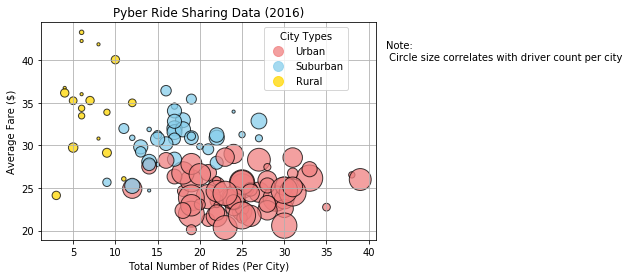

In [3]:
# Create an array to hold different colors based on type of city

colors = np.where(New_df["type"]== "Urban", "lightcoral", '-')
colors[New_df["type"]== "Suburban"] = "skyblue"
colors[New_df["type"]== "Rural"] = "gold"

#Build Bubble Chart

BubbleChart = plt.scatter(x=TotalRides, y=AvgFare, s=AvgDriverCount*10, marker="o", c=colors, edgecolor="black", alpha=0.75)

#Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Create a legend
#create array to hold legend colors and city types
legend_colors = ["lightcoral", "skyblue", "gold"]
legend_cities = ["Urban", "Suburban", "Rural"]

#create patches
patches = [ plt.plot([], marker="o", ms=10, ls="", color=legend_colors[i], alpha=0.75,
            label=legend_cities[i]) [0]  for i in range(len(legend_cities)) ]



plt.legend(handles=patches, bbox_to_anchor=(0.65, 1), loc='upper left', ncol=1, title = "City Types")


# Incorporate a text label regarding circle size
plt.text(42, 40, 'Note:\n Circle size correlates with driver count per city', horizontalalignment='left')


# Save Figure
plt.savefig("./Images/BubbleChart.png")

#Show plot
plt.show()


## Total Fares by City Type

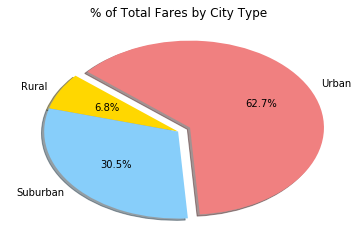

In [4]:
# Total Fares by City Type
TotalFareType = Combined_df.groupby( "type")["fare"].sum()
Cities = ["Rural", "Suburban", "Urban"]
Colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)


# Build pie chart based upon the above data
plt.pie(TotalFareType, explode=explode, labels=Cities, colors=Colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")


#Save Figure
plt.savefig("./Images/FaresByCityType.png")

#Show plot
plt.show()




## Total Rides by City Type

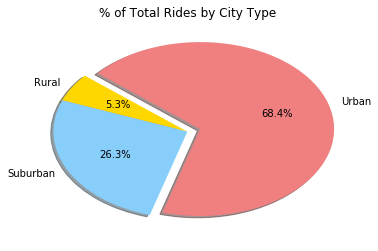

In [5]:
# Total Ride by City Type
TotalRidesType = Combined_df.groupby( "type")["ride_id"].count()
Cities = ["Rural", "Suburban", "Urban"]
Colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)


# Build pie chart based upon the above data
plt.pie(TotalRidesType, explode=explode, labels=Cities, colors=Colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

# Save Figure

plt.savefig("./Images/RidesByCityType.png")

#Show plot
plt.show()




## Total Drivers by City Type

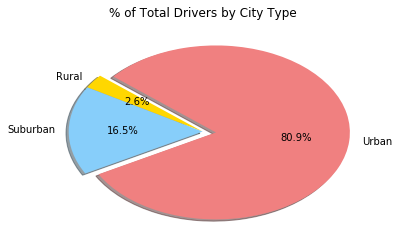

In [6]:
# Total Drivers by City Type
TotalDriversType = Combined_df.drop_duplicates(['city']).groupby( "type")["driver_count"].sum()
Cities = ["Rural", "Suburban", "Urban"]
Colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)


# Build pie chart based upon the above data
plt.pie(TotalDriversType, explode=explode, labels=Cities, colors=Colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

#Save Figure
plt.savefig("./Images/DriversByCityType.png")

# Show plot
plt.show()

